# Imported Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Data

In [2]:
#Displayed the first rows
#This dataset contains information about the passengers on the  Titanic and whether they survived the disaster.
# Our  goal is to predict the Survived status of passengers based on other attributes.
titanic_data = pd.read_csv("titanic.csv",sep=",",header=[0])
print("Successfully Imported Data!")
titanic_data.head(5)

Successfully Imported Data!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(titanic_data.shape)
print(f'Dataset has {len(titanic_data.columns)} columns and {len(titanic_data.index)} rows with data.')

(891, 12)
Dataset has 12 columns and 891 rows with data.


# Information about the DataFrame

In [4]:
#The target columns have values which are in relation with each other.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Description

In [5]:
##Provides a statistical summary of our DataFrame
#count:The number of non-null observations for each column.
#Its not the same everywhere that means we have some missing values.
# This helps in understanding the underlying characteristics of the data.
titanic_data.describe(include='all')
#Since "Survived" is numeric (0 or 1), the describe() function for numeric data doesn't compute the number of unique values.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Finding Null Values

In [6]:
#finding and handling null values is essential for maintaining the quality and usability of data, 
#ensuring accurate analysis, and building reliable models.
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


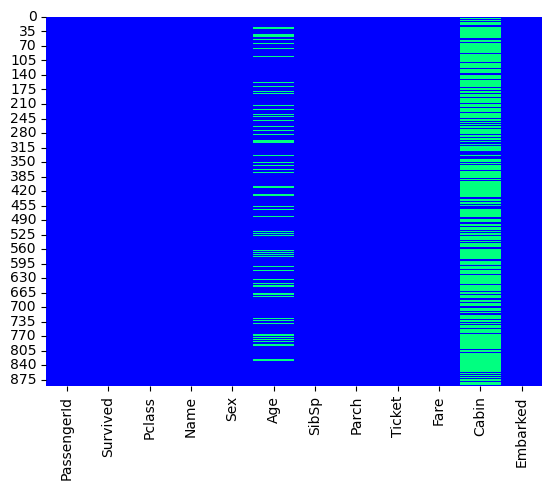

In [7]:
#visualize the missing data
sns.heatmap(titanic_data.isnull(), cmap='winter', cbar=False)
plt.show()

In [8]:
# Selected numerical values
numerical_columns = titanic_data.select_dtypes(include=['int64', 'float64']).columns
#filled missing Values in numerical columns
titanic_data[numerical_columns] = titanic_data[numerical_columns].fillna(titanic_data[numerical_columns].mean())
#identify and selected all categorical columns in the DataFrame.
categorical_columns = titanic_data.select_dtypes(include='object').columns
#replaced the missing values (NaNs) with the specified value, which in this case is 'Unknown'.
titanic_data[categorical_columns] = titanic_data[categorical_columns].fillna('Unknown')

In [9]:
#Now we dont have missing values.
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [34]:
#titanic_data.describe(include='all')

# PLOTS

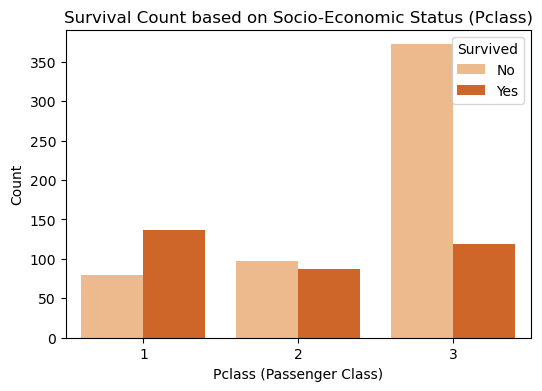

In [10]:
# Visualizing survival based on socio-economic status (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='Oranges')
plt.title('Survival Count based on Socio-Economic Status (Pclass)')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()
#So, from here we can define 1st class passengers survived more as compared 2nd and 3rd class.

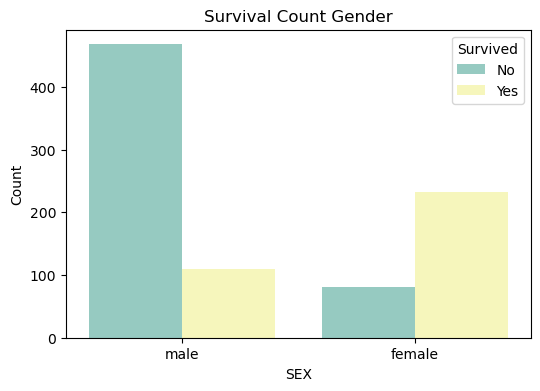

In [11]:
# Visualizing survival based Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=titanic_data, palette='Set3')
plt.title('Survival Count Gender')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()
#So, from here we can define FEMALE passengers survived more as compared to male passengers

# Adjust the Data

In [12]:
#Drop irrelevant data
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']

titanic_data1 = titanic_data.drop(columns=columns_to_drop)
titanic_data1

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
1,1,1,female,38.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0
887,1,1,female,19.000000,0,0
888,0,3,female,29.699118,1,2
889,1,1,male,26.000000,0,0


In [13]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
titanic_data1['Sex'] = label_encoder.fit_transform(titanic_data1['Sex'])
#male is encoded as 1
#female is encoded as 0

In [14]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [15]:
titanic_data1.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


# Define X and y

In [16]:
# Separate features and target variable
X = titanic_data1.drop('Survived', axis=1)
y = titanic_data1['Survived']

In [17]:
X

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.000000,1,0
1,1,0,38.000000,1,0
2,3,0,26.000000,0,0
3,1,0,35.000000,1,0
4,3,1,35.000000,0,0
...,...,...,...,...,...
886,2,1,27.000000,0,0
887,1,0,19.000000,0,0
888,3,0,29.699118,1,2
889,1,1,26.000000,0,0


In [18]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
#1 indicates that the passenger survived.
#0 indicates that the passenger did not survive.
survival_counts = titanic_data['Survived'].value_counts()
survival_counts

Survived
0    549
1    342
Name: count, dtype: int64

In [20]:
#It shows how many females survived 
female_survivors = titanic_data[(titanic_data['Sex'] == 'female') & (titanic_data['Survived'] == 1)]
female_survivor_count = female_survivors.shape[0]

female_survivor_count

233

In [21]:
##It shows how many males survived 
male_survivors = titanic_data[(titanic_data['Sex'] == 'male') & (titanic_data['Survived'] == 1)]
male_survivor_count = male_survivors.shape[0]

male_survivor_count

109

# Histogram

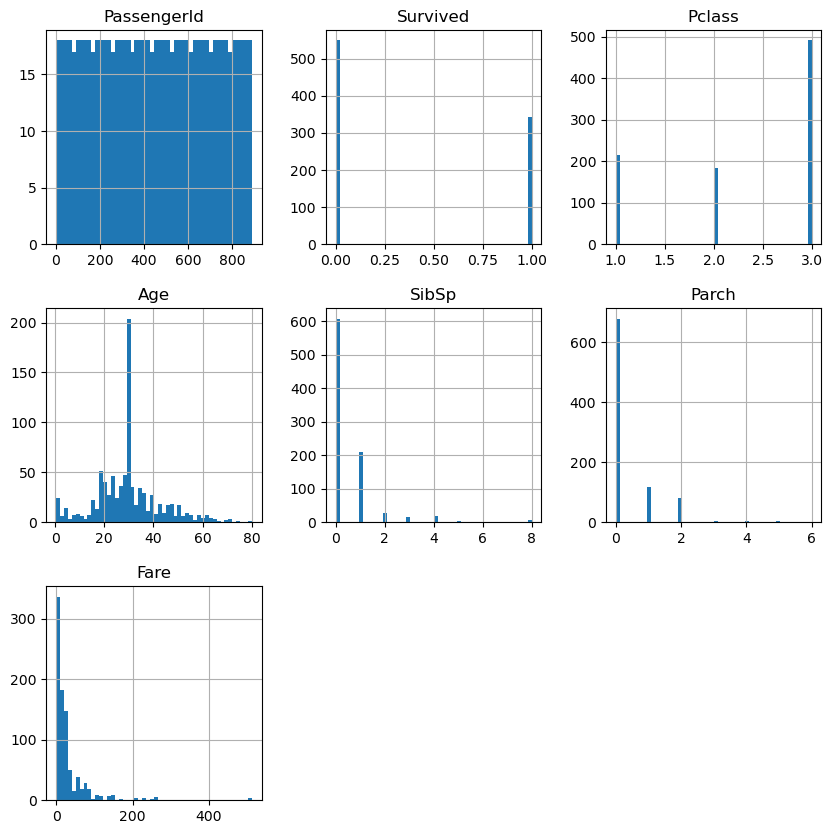

In [22]:
titanic_data.hist(figsize=(10,10),bins=50)
plt.show()
# Provide a quick overview of the distribution of different numerical features in the dataset, 
# which can help in understanding the data better and making decisions for further analysis or preprocessing steps.
# Survived: Indicates more passengers didnt survive and more Pclass: travelled in 3rd class.
#SbSp: Most had 0 or 1 sibling/spouse aboard and Parch: 0 parents/children aboard.


# Building a Machine Learning Model

#Importing all the necessary libraries for building model

In [23]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Split the data train and test

In [24]:
# Split the training data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Decision Tree

In [25]:
#Train the model and fit it 
modeltree = DecisionTreeClassifier(random_state=42)
modeltree.fit(X_train, y_train)
DecisionTreeClassifier()


DecisionTreeClassifier()

# Evaluation

In [26]:
#Evaluate the model using several metrics, including accuracy, F1 score, and a detailed classification report
y_pred = modeltree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1_score:",f1_score(y_test, y_pred)) #for survived
print(classification_report(y_test, y_pred))
#Accuracy: means that about 76% of the predictions made by the model are correct.
#F1 Score: approximately 70%, indicating a balance between precision and recall.
#Precision: 78% (out of all instances predicted as class 0, were correct).        
#Recall: 83% (out of all actual class 0 instances, were correctly predicted).

Accuracy: 0.7597765363128491
F1_score: 0.6950354609929078
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       105
           1       0.73      0.66      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



# Random Forest 

In [27]:
# Split the training data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

# Create the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
     

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluation

In [28]:
# Predict on the train dataset and check for accuracy
y_pred2 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print("F1_score:",f1_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
#0 didnt survive and 1 survive 
# f1_score: Indicates a balance between precision and recall, especially useful for class 1 (survived).

Accuracy: 0.8268156424581006
F1_score: 0.7832167832167832
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Extreme Gradient Boosting

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)


print("Accuracy Score:",accuracy_score(y_test,y_pred3))
print("F1_score:",f1_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

Accuracy Score: 0.8324022346368715
F1_score: 0.7826086956521738
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Results based on the Accuracy

In [30]:
results = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','RandomForestClassifier', 'XGBClassifier'],
    'Accuracy': [0.759,0.826,0.832]})

result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df
#Methods like XGBClassifier and RandomForestClassifier tend to perform better than single models like DecisionTreeClassifier
#due to their ability to reduce overfitting and combine the strengths of multiple weak learners.

,Model
Accuracy,
0.832,XGBClassifier
0.826,RandomForestClassifier
0.759,DecisionTreeClassifier


# Plotting the F1 scores

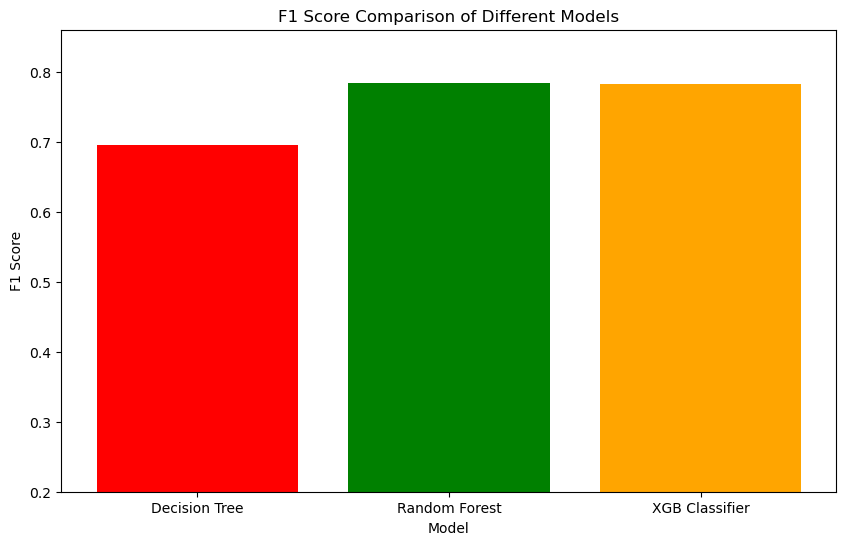

In [31]:
f1_scores = [0.759, 0.826, 0.832]
models = ['Decision Tree', 'Random Forest', 'XGB Classifier']

# Plotting the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['red', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Different Models')
plt.ylim([0.20, 0.86])  # Setting the y-axis limit for better comparison
plt.show()
#that's actually on how many survived compared which model gave a better comparison in this case: Random Forest and XGB 

# Confussion matrix based on the decision tree

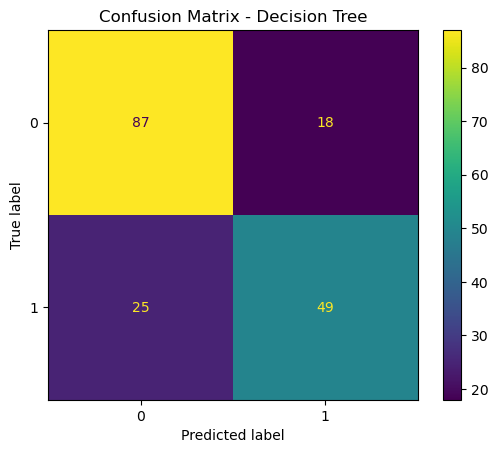

In [32]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(modeltree, X_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()
#Meaning of the Confusion Matrix:
#87: These are the cases where the actual class was "Did not survive" (0), and the model correctly predicted 
#18: These are the cases where the actual class was "Did not survive" (0), but the model incorrectly predicted "Survived" (1)
#25: These are the cases where the actual class was "Survived" (1), but the model incorrectly predicted "Did not survive" (0)
#49:These are the cases where the actual class was "Survived" (1), and the model correctly predicted "Survived" (1).
